In [2]:
import tensorflow as tf
import os
import cv2
import imghdr
from matplotlib import pyplot as plt
import numpy as np

In [3]:
data = tf.keras.utils.image_dataset_from_directory('C:\Python\AI\CNN\Dogs-vs-Cats-Classification\cat-dog-data\dataset')

Found 10000 files belonging to 2 classes.


In [4]:
data_iterator = data.as_numpy_iterator()

In [5]:
batch = data_iterator.next()

In [6]:
batch

(array([[[[250.80869 , 239.53728 , 213.53728 ],
          [240.8811  , 226.8811  , 199.03345 ],
          [231.25383 , 216.25383 , 186.50774 ],
          ...,
          [216.3406  , 189.3406  , 168.3406  ],
          [207.5636  , 188.13612 , 164.42603 ],
          [227.63867 , 213.51656 , 187.8829  ]],
 
         [[251.98207 , 239.98207 , 213.98207 ],
          [238.50601 , 224.50601 , 196.65836 ],
          [234.62582 , 219.62582 , 189.87973 ],
          ...,
          [213.04666 , 186.04666 , 165.04666 ],
          [202.97162 , 184.42865 , 161.07979 ],
          [224.22266 , 211.45813 , 188.0625  ]],
 
         [[251.80002 , 239.80002 , 213.80002 ],
          [244.52596 , 230.52596 , 202.6783  ],
          [245.36285 , 230.36285 , 200.61676 ],
          ...,
          [218.29724 , 191.62146 , 170.45935 ],
          [206.69543 , 188.98416 , 168.17096 ],
          [225.4758  , 213.82617 , 193.56445 ]],
 
         ...,
 
         [[138.345   , 173.345   , 117.34501 ],
          [156.038

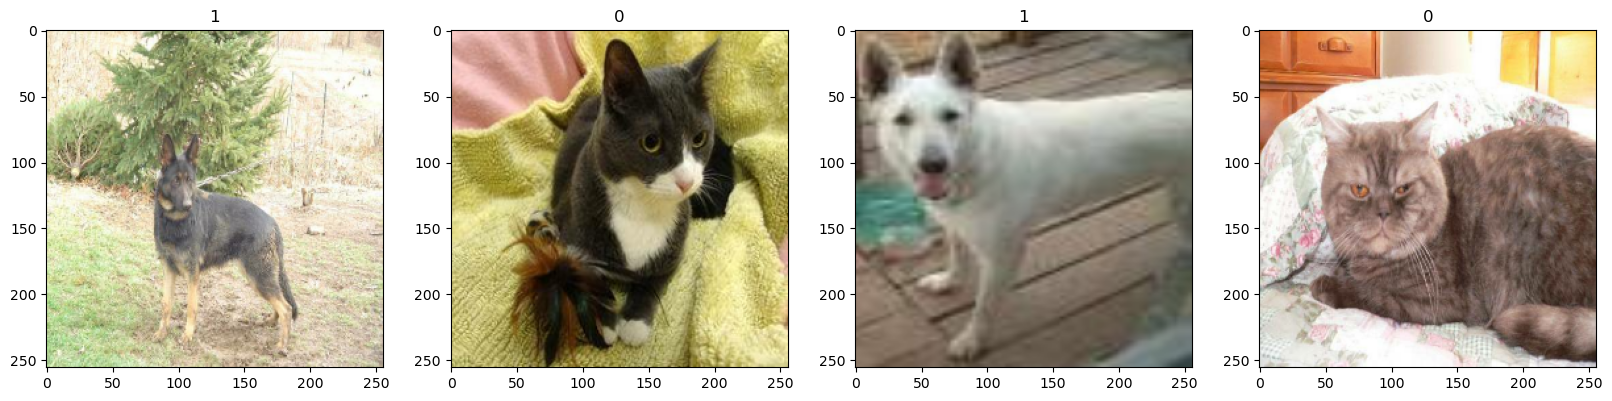

In [7]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [8]:
data = data.map(lambda x, y: (x/255, y))

In [9]:
data.as_numpy_iterator().next()[0].max()

1.0

In [10]:
len(data)

313

In [11]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)

In [12]:
train_size

219

In [13]:
val_size

63

In [14]:
test_size

31

In [15]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [17]:
model = Sequential()

In [18]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [19]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 32)       0

In [21]:
logdir='logs'

In [22]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [23]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
219/219 [==============================] - 24s 73ms/step - loss: 0.7205 - accuracy: 0.5791 - val_loss: 0.6635 - val_accuracy: 0.5952
Epoch 2/20
219/219 [==============================] - 16s 73ms/step - loss: 0.6425 - accuracy: 0.6274 - val_loss: 0.6433 - val_accuracy: 0.6215
Epoch 3/20
219/219 [==============================] - 17s 76ms/step - loss: 0.5702 - accuracy: 0.7008 - val_loss: 0.6594 - val_accuracy: 0.6473
Epoch 4/20
219/219 [==============================] - 16s 73ms/step - loss: 0.4368 - accuracy: 0.7937 - val_loss: 0.7490 - val_accuracy: 0.6453
Epoch 5/20
219/219 [==============================] - 16s 70ms/step - loss: 0.2437 - accuracy: 0.8984 - val_loss: 1.0361 - val_accuracy: 0.6453
Epoch 6/20
219/219 [==============================] - 16s 74ms/step - loss: 0.1365 - accuracy: 0.9539 - val_loss: 1.3625 - val_accuracy: 0.6409
Epoch 7/20
219/219 [==============================] - 16s 72ms/step - loss: 0.0708 - accuracy: 0.9762 - val_loss: 1.7446 - val_accuracy:

In [24]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [25]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [26]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 208ms/step


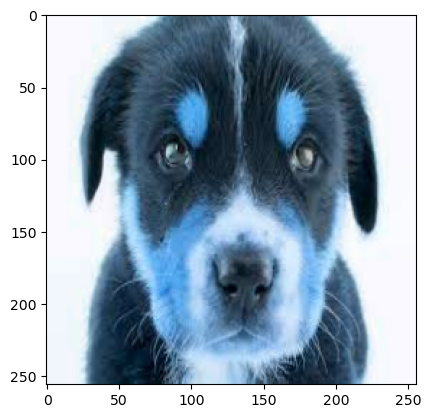

In [29]:
img = cv2.imread('C:\Python\AI\CNN\Dogs-vs-Cats-Classification\dogtest1.jpg')
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [30]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 111ms/step


In [31]:
yhat

array([[0.99728096]], dtype=float32)

In [32]:
if yhat > 0.5: 
    print(f'Predicted class is Dog')
else:
    print(f'Predicted class is Cat')

Predicted class is Dog


In [33]:
from tensorflow.keras.models import load_model

In [35]:
model.save('C:\Python\AI\CNN\Dogs-vs-Cats-Classification')

INFO:tensorflow:Assets written to: C:\Python\AI\CNN\Dogs-vs-Cats-Classification\assets


INFO:tensorflow:Assets written to: C:\Python\AI\CNN\Dogs-vs-Cats-Classification\assets


In [ ]:
#to load model: new_model = load_model('imageclassifier.h5')
# make sure to import load_model from tensorflow.keras.models 